# Daily and Cumulative Returns, CAPM

This post includes code and notes from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [6]:
from scipy import stats

In [66]:
# help(stats.linregress)

In [8]:
import pandas as pd

In [9]:
import pandas_datareader as web

In [40]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')

FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

VRTTX_stock = web.DataReader('VRTTX', 'yahoo', start, end)
VRTTX_stock.head()


FNCMX_stock = web.DataReader('FNCMX', 'yahoo', start, end)
FNCMX_stock.head()

FSMAX_stock = web.DataReader('FSMAX', 'yahoo', start, end)
FSMAX_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,65.269997,65.269997,65.269997,65.269997,0.0,65.192108
2020-01-03,65.129997,65.129997,65.129997,65.129997,0.0,65.052277
2020-01-06,65.279999,65.279999,65.279999,65.279999,0.0,65.202103
2020-01-07,65.180000,65.180000,65.180000,65.180000,0.0,65.102219
2020-01-08,65.410004,65.410004,65.410004,65.410004,0.0,65.331947


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
stocks

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
Date,,,,
2018-01-02,94.230003,238.889999,91.989998,62.529999
2018-01-03,94.830002,240.289993,92.760002,62.740002
2018-01-04,95.230003,241.199997,92.930000,62.849998
2018-01-05,95.900002,242.750000,93.699997,63.090000
2018-01-08,96.059998,243.199997,93.970001,63.270000
...,...,...,...,...
2021-02-08,135.880005,355.709991,175.610001,93.940002
2021-02-09,135.750000,355.730011,175.839996,94.400002
2021-02-10,135.699997,355.579987,175.380005,94.309998


## Compare Cumulative Return

In [64]:
FXAIX_stock['Cumulative'] = FXAIX_stock['Close']/FXAIX_stock['Close'].iloc[0]
VRTTX_stock['Cumulative'] = VRTTX_stock['Close']/VRTTX_stock['Close'].iloc[0]
FNCMX_stock['Cumulative'] = FNCMX_stock['Close']/FNCMX_stock['Close'].iloc[0]
FSMAX_stock['Cumulative'] = FSMAX_stock['Close']/FSMAX_stock['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

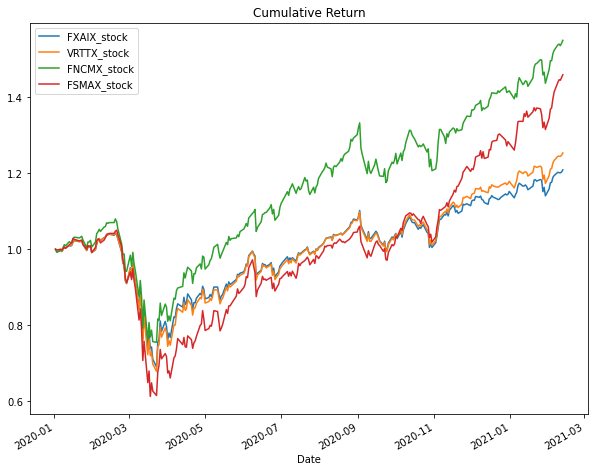

In [65]:
FXAIX_stock['Cumulative'].plot(label='FXAIX_stock',figsize=(10,8))
VRTTX_stock['Cumulative'].plot(label='VRTTX_stock',figsize=(10,8))
FNCMX_stock['Cumulative'].plot(label='FNCMX_stock',figsize=(10,8))
FSMAX_stock['Cumulative'].plot(label='FSMAX_stock',figsize=(10,8))
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [45]:
FXAIX_stock['Daily Return'] = FXAIX_stock['Close'].pct_change(1)
VRTTX_stock['Daily Return'] = VRTTX_stock['Close'].pct_change(1)

In [46]:
FXAIX_stock['Daily Return']

Date
2020-01-02         NaN
2020-01-03   -0.006992
2020-01-06    0.003565
2020-01-07   -0.002664
2020-01-08    0.004898
                ...   
2021-02-08    0.007414
2021-02-09   -0.000957
2021-02-10   -0.000368
2021-02-11    0.001916
2021-02-12    0.004707
Name: Daily Return, Length: 282, dtype: float64

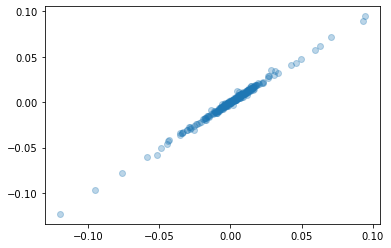

In [47]:
plt.scatter(FXAIX_stock['Daily Return'],VRTTX_stock['Daily Return'],alpha=0.3)

<AxesSubplot:>

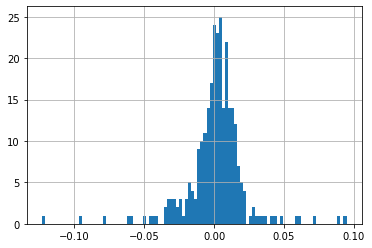

In [49]:
VRTTX_stock['Daily Return'].hist(bins=100)

<AxesSubplot:>

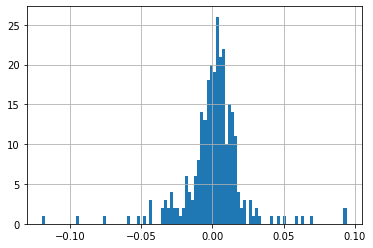

In [50]:
FXAIX_stock['Daily Return'].hist(bins=100)

In [51]:
beta,alpha,r_value,p_value,std_err = stats.linregress(FXAIX_stock['Daily Return'].iloc[1:],VRTTX_stock['Daily Return'].iloc[1:])

In [52]:
beta

1.0124150273238781

In [53]:
alpha

0.00012460564758023734

In [54]:
r_value

0.9973781994620393

In [55]:
FXAIX_stock['Daily Return'].head()

Date
2020-01-02         NaN
2020-01-03   -0.006992
2020-01-06    0.003565
2020-01-07   -0.002664
2020-01-08    0.004898
Name: Daily Return, dtype: float64

In [56]:
import numpy as np

In [57]:
noise = np.random.normal(0,0.001,len(FXAIX_stock['Daily Return'].iloc[1:]))

In [1]:
#noise

In [60]:
FXAIX_stock['Daily Return'].iloc[1:] + noise

Date
2020-01-03   -0.006673
2020-01-06    0.002797
2020-01-07   -0.002088
2020-01-08    0.005773
2020-01-09    0.007326
                ...   
2021-02-08    0.006484
2021-02-09   -0.000506
2021-02-10   -0.000078
2021-02-11    0.001277
2021-02-12    0.005154
Name: Daily Return, Length: 281, dtype: float64

In [61]:
beta,alpha,r_value,p_value,std_err = stats.linregress(FXAIX_stock['Daily Return'].iloc[1:]+noise,FXAIX_stock['Daily Return'].iloc[1:])

In [62]:
beta

0.9959066537237841

In [63]:
alpha

0.00011917125339144037